# Getting started with R

##### JGI Data Science training workshop - Feb 14, 2018
Wyatt Hartman, Metagenome and Prokaryote Programs

## Workshop Overview:
This tutorial is designed primarily for new R users with no prior programming experience.  Code cells in this notebook show new users how to import and manipulate data, including their own data.  The goals of this workshop is to gain familiarity with the basics, not necessarily mastery.  I believe users will learn this material best by revisiting the code with an example of their own data in hand.  

Relatively simple graphics are shown here, as this workshop will be followed by one on data visualization using the ggplot2 library. I recommend an excellent set of tutorials for those who cannot attend our ggplot workshop http://www.sthda.com/english/wiki/ggplot2-essentials.  

For beginners in R, I strongly recommend using this site (http://www.sthda.com/) as a learning resource given the breadth, depth, and clarity of tutorials.  The site provides clear instructions for installing R on your own machine. You can also find tutorials to learn basic R programming and statistical methods on the site.

For advanced programmers coming from another language, I recommend Advanced R to get you directly to the information you need http://adv-r.had.co.nz/.  Those experienced with Python might also find this mapping of data functions helpful: https://pandas.pydata.org/pandas-docs/stable/comparison_with_r.html 

## Learning Objectives:

#### By working through this notebook, you will become familar with: 
    - R packages: Installing, Loading, getting help and data
    - Reading and writing data
    - Obtaining data from data frames
    - Other data structures including matrices, vectors, strings, and lists
    - aggregating and merging data
    - Making simple plots

## Outline:

### 0) How to use this notebook

### 1) Loading libraries and data
    a) Working with packages
    b) Working directory
    c) Writing/reading data
    d) Getting help with a function
        
### 2) Working with data: Data frames
    a) Data frame basics
    b) Selecting data from data frames
    c) Making new data frames 
    d) Simple plotting exercises       
        
### 3) Simple workflow demonstration
    a) Summarizing data
    b) Aggregating data
    c) Working with factors
    d) Sorting data
    e) Sorting factors (and plotting)
    
### 4) Using other data structures
    a) Working with text (strings)
    b) Dealing with missing data (NAs)
    c) Merging data sets
    d) Were Japanese cars more efficient?
    
### 5) Reshaping data
    a) Transposing data
    b) Re-casting data shape
    c) Melting data
    d) Why do US cars have such poor MPG?


# Additional material 
### 6) Getting data from basic data structures
    a) Getting data from a matrix
    b) Adding new data to a matrix
    c) Make a new matrix
    d) Sweep a function across a matrix
    e) Getting data from vectors
    f) Getting data from lists

### 7) Basic programming in R
    a) For loops
    b) Defining functions
    c) Apply family of functions  


## 0) How to use this notebook

### To run code in a cell, hold Shift + Return.

In [1]:
                          # This is where comments on code live

x <- 5                    # <- defines a variable

In [2]:
x                         # evaluate x

[1] 5

In [3]:
# x                       # "#" Comments out code  

In [4]:
hi <- "hello world"       # you too can write code
hi                        # evaluate hi

[1] "hello world"

## 1) Loading libraries and data
We begin by exploring packages in R, which are external bundles of code.  Packages come with documentation to help you learn them.  Often R packages are bundled with demonstration data sets which can be read separately.

Using the included "mtcars" dataset, you will learn to load, write, and read data.  At this point you will be able to import your own data as well !   

### a) Working with Packages

In [5]:
# To install a package in R
# install.packages("car")             # Or in Rstudio use Tools -> Install Packages

In [6]:
# Load a package
library("car")

Warning message:
“package ‘car’ was built under R version 3.4.3”

In [7]:
# Get package help
help("car")                           # See documentation linked at URL: ...//CRAN.R...  Manual and vignette

# data(package="car")                 # view data sets that come with packages
# vignette("hcl-colors")              # some packages have included tutorials called vignettes

In [8]:
# Load dataset from a package
data(mtcars)

# Show the first rows of this data 
head(mtcars)                          # head() shows first few rows of data

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


### b) Working directory
While not used in this demonstration, this makes working in R a lot easier.
The working directory lets you call files by their name if they are in this folder. Otherwise, you have to specify the filepath );

In [9]:
# Before you start a project
getwd()                          # what folder are you reading and writing data in?  [wd = working directory]
 
# more typical 
# setwd("~Desktop/my_folder")    # pick a folder on your desktop
# getwd()                        # confirm you are in this folder

[1] "/Volumes/due/Desktop/JGI_dataSci"

### c) Writing / Reading data
  
Here we export and import data as tab delimited text, a preferred format. This can be obtained from Excel using Save As -> Format: Tab Delimited Text (.txt). Excel will read this data using the function Open -> Delimited -> Tab. 

Some will find comma separated text format (.csv) preferable, as Excel will read this format directly. There are also R packages to read Excel files directly ("xlsx", "readxl"), which are not covered here. I recommend working with tab delimited text instead of using these. 

In [10]:
# Save the data as a text file
write.table(mtcars, "cars_tab.txt", sep="\t")                # write table, tab separated (sep='\t')

In [11]:
# Read data from text file
newcar <-read.table("cars_tab.txt", header=TRUE, sep="\t")   # read tab separated table, with column names
head(newcar)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


### d) Get documentation for a function
Arguments to a function are listed, then explained below. Arguments with "=" in function description are OPTIONAL.
These args. have defaults (shown), which can be modified.  Each argument is explained in documentation. Example use of function is shown at the end of documentation.  

In [12]:
# Get documentation for a function
?read.table                                 

In [13]:
# If you insist on writing/reading with .csv files
# ?write.csv
# ?read.csv

## 2) Working with data: Data Frames

A data frame is an object that functions like a spreadsheet. Data frames can hold both numbers and text, unlike a Data matrix which contains only numbers.   

By making your data frame (spreadsheet) an object, you can easily manipulate it.  First we will want to know how to get information about our data.  Then we will walk through how to access and extract data. 

### a) Data frame basics
Get dataset info, column and row names. Add new columns

In [14]:
# Get information about an object, here a data frame            
attributes(newcar)                                     # tell me about newcar 

$names
 [1] "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"   "gear"
[11] "carb"

$class
[1] "data.frame"

$row.names
 [1] "Mazda RX4"           "Mazda RX4 Wag"       "Datsun 710"         
 [4] "Hornet 4 Drive"      "Hornet Sportabout"   "Valiant"            
 [7] "Duster 360"          "Merc 240D"           "Merc 230"           
[10] "Merc 280"            "Merc 280C"           "Merc 450SE"         
[13] "Merc 450SL"          "Merc 450SLC"         "Cadillac Fleetwood" 
[16] "Lincoln Continental" "Chrysler Imperial"   "Fiat 128"           
[19] "Honda Civic"         "Toyota Corolla"      "Toyota Corona"      
[22] "Dodge Challenger"    "AMC Javelin"         "Camaro Z28"         
[25] "Pontiac Firebird"    "Fiat X1-9"           "Porsche 914-2"      
[28] "Lotus Europa"        "Ford Pantera L"      "Ferrari Dino"       
[31] "Maserati Bora"       "Volvo 142E"

In [15]:
# More ways to get information about this dataframe: 
dim(newcar)                                            # get dimensions of dataset in rows and columns
colnames(newcar)                                       # get column names

[1] 32 11

[1] "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"   "gear"
[11] "carb"

In [16]:
# Assign row names to a new variable
car_model <- row.names(newcar)                         # get row names, assign to new variable
car_model                                              # show data
length(car_model)                                      # get length of this vector

[1] "Mazda RX4"           "Mazda RX4 Wag"       "Datsun 710"         
 [4] "Hornet 4 Drive"      "Hornet Sportabout"   "Valiant"            
 [7] "Duster 360"          "Merc 240D"           "Merc 230"           
[10] "Merc 280"            "Merc 280C"           "Merc 450SE"         
[13] "Merc 450SL"          "Merc 450SLC"         "Cadillac Fleetwood" 
[16] "Lincoln Continental" "Chrysler Imperial"   "Fiat 128"           
[19] "Honda Civic"         "Toyota Corolla"      "Toyota Corona"      
[22] "Dodge Challenger"    "AMC Javelin"         "Camaro Z28"         
[25] "Pontiac Firebird"    "Fiat X1-9"           "Porsche 914-2"      
[28] "Lotus Europa"        "Ford Pantera L"      "Ferrari Dino"       
[31] "Maserati Bora"       "Volvo 142E"

[1] 32

In [17]:
# Add variable to dataset as column
newcar$model <- car_model                              # "$" indicates column in dataframe, <- assigns car_model data 
head(newcar)                                           # show first few rows

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,model
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,Mazda RX4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,Mazda RX4 Wag
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,Datsun 710
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,Hornet 4 Drive
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,Hornet Sportabout
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1,Valiant


In [18]:
# a data matrix holds numbers, but not text
newcar_M <- data.matrix(newcar)                        # make data matrix   
tail(newcar_M)                                         # show last few rows

Warning message in data.matrix(newcar):
“NAs introduced by coercion”

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,model
Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.7,0,1,5,2,NA
Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2,NA
Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4,NA
Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6,NA
Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8,NA
Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2,NA


### b) Selecting data from dataframes

In [19]:
# get a single column
mpg <- newcar$mpg                                                   # get data from single column
mpg                                                                 # show data   

# newcar["mpg"]                                                     # get data as data frame -- good for own functions

[1] 21.0 21.0 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 17.8 16.4 17.3 15.2 10.4
[16] 10.4 14.7 32.4 30.4 33.9 21.5 15.5 15.2 13.3 19.2 27.3 26.0 30.4 15.8 19.7
[31] 15.0 21.4

In [20]:
# get columns in data frame using vector of column names
power_vars <- c("mpg", "cyl", "hp")                                 # vector of column names
power_vars                                                          

car_power <- newcar[power_vars]                                     # brackets are for data frame subsetting, here power_vars
head(car_power)

[1] "mpg" "cyl" "hp"

,mpg,cyl,hp
Mazda RX4,21.0,6,110
Mazda RX4 Wag,21.0,6,110
Datsun 710,22.8,4,93
Hornet 4 Drive,21.4,6,110
Hornet Sportabout,18.7,8,175
Valiant,18.1,6,105


In [21]:
# Specify range of rows, columns in to extract from dataframe 
car_power[1:3,1:2]                                                  # rows 1-3, columns 1-2

# All columns or all rows
# newcar[1:3,]                                                      # rows 1-3, all columns
# newcar[,1:4]                                                      # all rows, columns 1-4 

,mpg,cyl
Mazda RX4,21.0,6
Mazda RX4 Wag,21.0,6
Datsun 710,22.8,4


In [22]:
# Select rows based on mpg > 20
econ_cars <- newcar[newcar$mpg > 20,]                               # "," at end stands for "across all columns"
econ_cars

# as an alternative approach: ?subset

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,model
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda RX4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda RX4 Wag
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun 710
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet 4 Drive
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,Merc 240D
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,Merc 230
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1,Fiat 128
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2,Honda Civic
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1,Toyota Corolla
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1,Toyota Corona


### c) Making new data frames 

In [23]:
# Make a new data frame
econ_mpg_hp <-data.frame(econ_cars$mpg, econ_cars$hp)               # use "," to add new columns
head(econ_mpg_hp)                                                   # note name is transferred
                                                                    # note rownames are dropped in new data frame    

econ_cars.mpg,econ_cars.hp
21.0,110
21.0,110
22.8,93
21.4,110
24.4,62
22.8,95


In [24]:
# New data frame while renaming columns
econ_mpg_hp <-data.frame(MPG = econ_cars$mpg, HP = econ_cars$hp,    # can assign new column names with "="
                         model = econ_cars$model)                   # add return after "," for readability
head(econ_mpg_hp)

MPG,HP,model
21.0,110,Mazda RX4
21.0,110,Mazda RX4 Wag
22.8,93,Datsun 710
21.4,110,Hornet 4 Drive
24.4,62,Merc 240D
22.8,95,Merc 230


In [25]:
# Specifying columns from existing data frame often better solution 
# repeated from above
power_vars <- c("mpg", "cyl", "hp")                                 # vector of column names
car_power <- newcar[power_vars]                                     # brackets are for data frame subsetting, here power_vars
head(car_power)                                                     # note row names still in place

# alternately: 
# car_power <- newcar[,c("mpg", "cyl", "hp")]                       # bracket and comma notation with vector 

,mpg,cyl,hp
Mazda RX4,21.0,6,110
Mazda RX4 Wag,21.0,6,110
Datsun 710,22.8,4,93
Hornet 4 Drive,21.4,6,110
Hornet Sportabout,18.7,8,175
Valiant,18.1,6,105


### d) Simple plotting execercises

In [26]:
options(repr.plot.width=4, repr.plot.height=4)                      # sets plot size in Jupyter notebook 

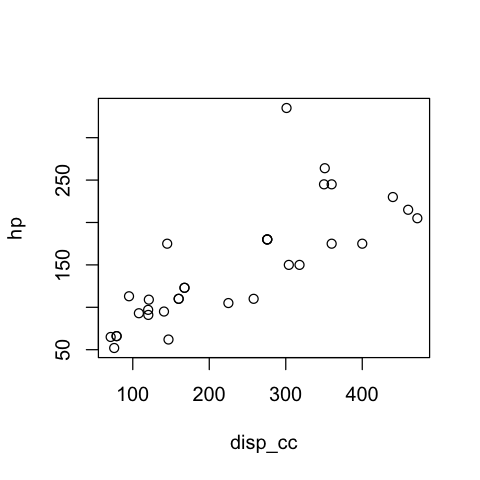

In [27]:
#plot(x=newcar$disp, y=newcar$hp)
plot(x=newcar$disp, y=newcar$hp, , xlab="disp_cc", ylab="hp")

In [28]:
# use ggplot 2 graphics
library("ggplot2")                                                              # load ggplot2


Attaching package: ‘ggplot2’

The following object is masked _by_ ‘.GlobalEnv’:

    mpg



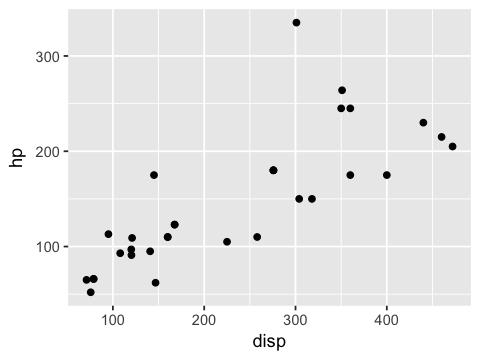

In [29]:
options(repr.plot.width=4, repr.plot.height=3)                                  # sets plot size in Jupyter notebook 

# use ggplot 2 graphics
ggplot(newcar, aes(x= disp, y = hp)) + geom_point()                             # make scatterplot [geom_point]

# more options
# ggplot(newcar, aes(x= disp, y = hp)) + geom_point() + geom_smooth(method=lm)  # add trendline [geom_smooth]
# ggplot(newcar, aes(x= disp, y = hp, color=cyl)) + geom_point()                # add group color

# More tutorials
# http://www.sthda.com/english/wiki/ggplot2-scatter-plots-quick-start-guide-r-software-and-data-visualization

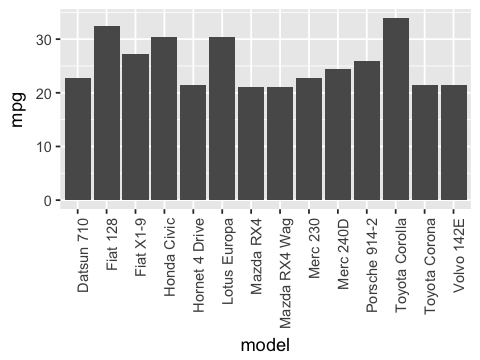

In [30]:
# Barplot of economy car mpg
options(repr.plot.width=4, repr.plot.height=3)                                  # sets plot size in Jupyter notebook 

ggplot(econ_cars, aes(x= model, y = mpg)) + geom_bar(stat = "identity") +       # geom_bar is barplot
     theme(axis.text.x = element_text(angle = 90, hjust = 1))                   # rotate axes 

#### Want to learn more ggplot2 ?

In [31]:
?ggplot2                                                   # get R documentation, link to site with tutorials

Again, I recommend this excellent set of tutorials for learning ggplot2 http://www.sthda.com/english/wiki/ggplot2-essentials

Near the bottom of this list of tutorials by plot type, even more information is given to help you customize your colors, axes, and labels: http://www.sthda.com/english/wiki/ggplot2-colors-how-to-change-colors-automatically-and-manually , http://www.sthda.com/english/wiki/ggplot2-title-main-axis-and-legend-titles

## 3) Workflow demonstration
How do we turn data sets into understanding of relationships?  Here use the "mtcars" data set to illustrate data manipulations need to make simple summaries and plots.  My goal is to show these steps as part of a story, while leaving plenty of links to online resources to pursue each step more deeply.

Here we explore relationships MPG and number of cylinders in the engine.  Simple data summaries (a) may not be sufficient for this, as we want to know about variation among engines by cylinder count.  The aggregate function (b) can create summaries by categories.  

Categorical data is represented by factors (c), which can be defined and manipulated to reshape our data.  Cells below also show how to sort data (d), and this differs from (e) sorting factor levels (categories). 

### a) Summarizing data
Using basic built in functions.
More advanced functions for generating summaries are described at the end of b). 

In [32]:
# Summarize variables in data set 
summary(mtcars[,1:4])                                                # get summary for first 4 columns
# ?summary                                                           # This built in function isn't amazing

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  

In [33]:
# only want means for each column?
colMeans(mtcars)                                                     # Built in Column means function
                                                                     # see also: rowMeans(), rowSums(), colSums  

mpg        cyl       disp         hp       drat         wt       qsec 
 20.090625   6.187500 230.721875 146.687500   3.596563   3.217250  17.848750 
        vs         am       gear       carb 
  0.437500   0.406250   3.687500   2.812500

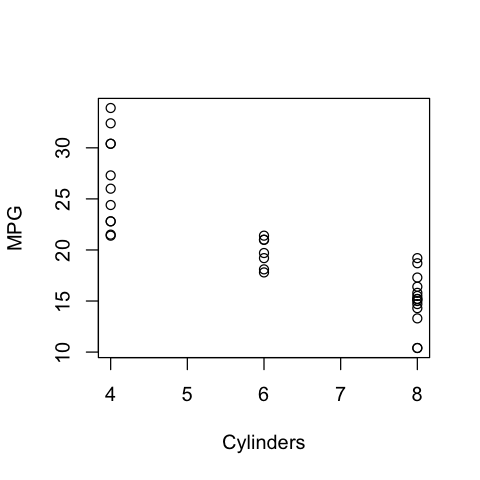

In [34]:
# Plotting mpg as a function of # cylinders
options(repr.plot.width=4, repr.plot.height=4)                       # sets plot size in Jupyter notebook, not Rstudio 

#plot(x = newcar$cyl, y = newcar$mpg)                                # plot using base R 
plot(x = newcar$cyl, y = newcar$mpg, xlab="Cylinders", ylab="MPG")   # add axis labels

In [35]:
# Excercise: Plot other data combinations in newcar data
# colnames(newcar)                                                   # show variable names

### b) Aggregating data 
The aggregate function is a powerful way to summarize data by a given variable, or more than one.

Here we use it to summarize the mean of every column, based on the number of cylinders in the car's engine.
There are many ways to use this function, and we can pass several kinds of functions to the FUN= argument, including sum, max, min, length, or even our own functions.

In [36]:
# Get column MEANS by cylinder

cyl_means <-aggregate(mtcars, by=list(mtcars$cyl), FUN=mean)         # use aggregate, with function as mean
#colnames(cyl_means)[1] <-"cylinders"                                # rename first column
cyl_means

Group.1,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
4,26.66364,4,105.1364,82.63636,4.070909,2.285727,19.13727,0.9090909,0.7272727,4.090909,1.545455
6,19.74286,6,183.3143,122.28571,3.585714,3.117143,17.97714,0.5714286,0.4285714,3.857143,3.428571
8,15.10000,8,353.1000,209.21429,3.229286,3.999214,16.77214,0.0000000,0.1428571,3.285714,3.500000


### More ways to generate data summaries

#### Use apply family of functions...................................................................... see section 7
apply(mtcars, 2, mean)                                               # here 2 indicates summarizing columns, not rows (1)

#### Sweep function easily generates % total data from matrix .................... see section 6.d

#### Using base  R : 
https://www.r-bloggers.com/r-tutorial-series-summary-and-descriptive-statistics/

### dplyr library might be best, but rather complex:    
https://cran.r-project.org/web/packages/dplyr/vignettes/dplyr.html

https://www.r-bloggers.com/using-r-quickly-calculating-summary-statistics-from-a-data-frame/

### c) Working with factors

Factors are categorical variables (or classes).  We might expect to see multiple observations (rows) for each value (level) in a class. Factors are most frequently text-based class labels. Numeric data can be used, but will be converted to the text representation (character values).  

In [37]:
# Make cylinder a FACTOR
newcar$cyl <-factor(newcar$cyl)                                     # make column a factor (category)
levels(newcar$cyl)                                                  # show LEVELS of factor (categorical var)

[1] "4" "6" "8"

In [38]:
# Rename levels of a factor
levels(newcar$cyl) <-c("four", "six", "eight")
levels(newcar$cyl)

[1] "four"  "six"   "eight"

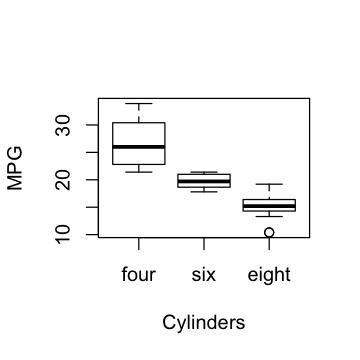

In [39]:
# now we can visualize MPG by number of cylinders
options(repr.plot.width=3, repr.plot.height=3)                      # sets plot size in Jupyter notebook 

plot(x = newcar$cyl, y = newcar$mpg, xlab="Cylinders", ylab="MPG")  # plot using base R graphics

In [40]:
# change the factor names back to original numbers
no_cyl <-c("4", "6", "8")                                            # make vector of num characters 
levels(newcar$cyl) <- no_cyl                                         # rename factors 
levels(newcar$cyl)

[1] "4" "6" "8"

In [41]:
# Select only data with particular factor level                      # Could work for numeric without quotes
six_cyl_cars <- newcar[newcar$cyl=="6",]                             # again, need comma to denote for all columns
six_cyl_cars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,model
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda RX4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda RX4 Wag
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet 4 Drive
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,Valiant
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,Merc 280
Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4,Merc 280C
Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6,Ferrari Dino


In [42]:
# recode numeric data as factor 
newcar$econo <- ifelse(newcar$mpg > 20, "econo", "low mpg")           # ifelse(condition, if true, if false)
newcar$econo <- as.factor(newcar$econo)                               # make strings factors 
levels(newcar$econo)                                                  # show factor levels 

[1] "econo"   "low mpg"

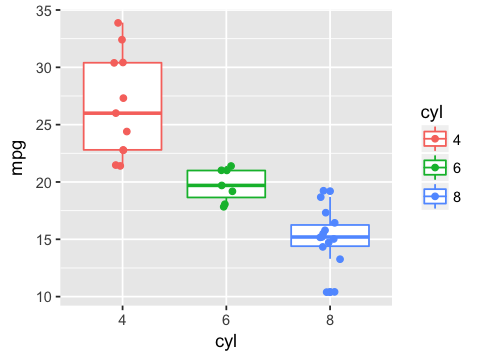

In [43]:
# Extra: Make ggplot2 boxplot
options(repr.plot.width=4, repr.plot.height=3)                        # sets plot size in Jupyter notebook 

# ggplot2 box plot
plot <- ggplot(newcar, aes(x=cyl, y=mpg, color=cyl)) + geom_boxplot() # make simple boxplots
plot + geom_jitter(position=position_jitter(0.1))           # add underlying data with jitter 

# For more, see boxplots tutorial at 
# http://www.sthda.com/english/wiki/ggplot2-box-plot-quick-start-guide-r-software-and-data-visualization

### d) Sorting data 
Using order function: Dataframe to be sorted[], order rows on(variable), for all columns

In [44]:
newcar <- newcar[order(-newcar$mpg),]                       # "-" in front of sorting variable gives descending order                     
# newcar <- newcar[order(newcar$mpg),]                      # ascending order 
# newcar[order(newcar$cyl, newcar$mpg),]                    # can also sort by more than one variable

head(newcar) # tail(newcar)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,model,econo
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1,Toyota Corolla,econo
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1,Fiat 128,econo
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2,Honda Civic,econo
Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2,Lotus Europa,econo
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1,Fiat X1-9,econo
Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2,Porsche 914-2,econo


### e) Sorting factor levels 
We would like to visualize relationships between MPG and cylinders for individual cars. While ggplot2 is a powerful, we still need to massage the data to get the plot to display the way we might imagine it.  Even though we sorted cars by mpg, ggplot does not arrange them this way. 

We will need to rearrange the car "model" FACTOR levels in order to plot them by MPG.   


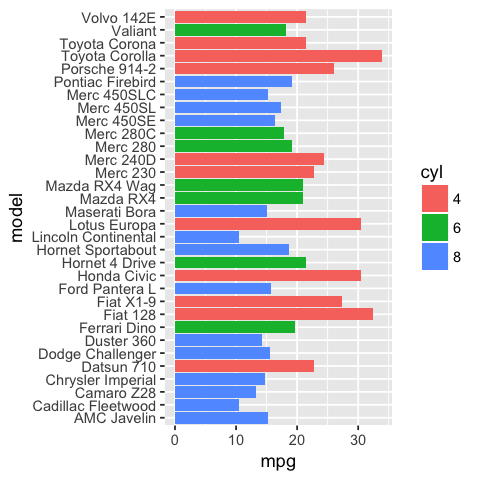

In [45]:
# plot MPG for each car model, grouped by number of cylinders
p1 <- ggplot(newcar, aes(x = model, y = mpg, fill = cyl)) +     # ggplot using newcar data, define x,y, color fill
        geom_bar(stat = "identity") + coord_flip()              # plot type (geom_bar), flip axes
       

options(repr.plot.width=4, repr.plot.height=4)                  # sets plot size in Jupyter notebook 

p1                                                              # Display plot defined above 

### sort factor levels

In [46]:
# Reorder factor (model) by order of another variable
newcar$model <- reorder(newcar$model, newcar$mpg)               # reorder model factor by mpg
# levels(newcar$model)


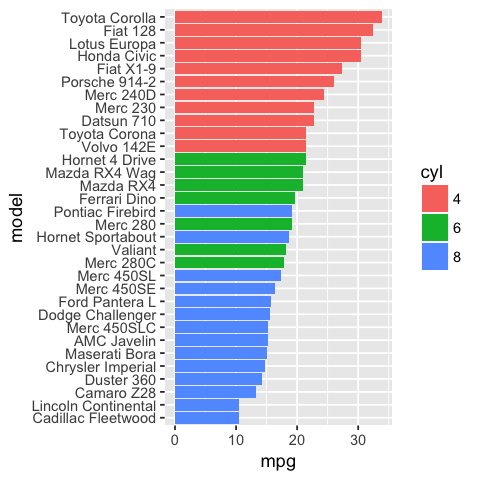

In [47]:
# Plot again with reordered factor levels
p2 <- ggplot(newcar, aes(x = model, y = mpg, fill = cyl)) +     # ggplot using newcar data, define x,y, color fill
        geom_bar(stat = "identity") + coord_flip()             # plot type (geom_bar), flip axes 

options(repr.plot.width=4, repr.plot.height=4)                  # sets plot size in Jupyter notebook 
p2

## 4) Other data structures
There are other essential data types and functions we will need to manipulate our data.  

This example adds the country of origin to our cars data set to illustrate how we can work with text (strings), remove missing data, and merge data across datasets.  Merging is an essential way to combine data, even when rows do not match exactly.

### a) Working with strings (aka character text)
Strings are character data, like that printed on your keyboard.  

Strings can contain letters, numbers, or punctuation, but numbers and punctuation are interpreted as text. Here we split strings in a column into pieces that were originally divided by a space (" ").  Each these split pieces are given their own columns.   

In [48]:
library(stringr)                                                         # library for manipulating strings

In [49]:
x <-6                                                                    # define x 
x                                                                        # x is numeric
as.character(x)                                                          # display x as a string

[1] 6

[1] "6"

In [50]:
# Look at car model data -- we want to separate the brand from model 
head(newcar$model)

[1] Toyota Corolla Fiat 128       Honda Civic    Lotus Europa   Fiat X1-9     
[6] Porsche 914-2 
32 Levels: Cadillac Fleetwood Lincoln Continental Camaro Z28 ... Toyota Corolla

In [51]:
# Split car models into make and model
make_model<-str_split(newcar$model, " ", 2, simplify=TRUE)               # Split strings by "", create 2 columns

make_model <-data.frame(make_model)                                      # Make data frame from list   
colnames(make_model) <-c("Make", "Model")                                # rename columns

make_model$model <- newcar$model                                         # add back original data
dim(make_model); head(make_model)       

[1] 32  3

Make,Model,model
Toyota,Corolla,Toyota Corolla
Fiat,128,Fiat 128
Honda,Civic,Honda Civic
Lotus,Europa,Lotus Europa
Fiat,X1-9,Fiat X1-9
Porsche,914-2,Porsche 914-2


In [52]:
# to combine strings instead, use the paste() function
#model2 <-paste(make_model$Make, make_model$Model, sep='_')

In [53]:
# show unique Makes of cars
unique(make_model$Make)

# get unique Makes as strings                                    
Make <-as.character(unique(make_model$Make))                                          
length(Make); Make

[1] Toyota   Fiat     Honda    Lotus    Porsche  Merc     Datsun   Hornet  
 [9] Volvo    Mazda    Ferrari  Pontiac  Valiant  Ford     Dodge    AMC     
[17] Maserati Chrysler Duster   Camaro   Cadillac Lincoln 
22 Levels: AMC Cadillac Camaro Chrysler Datsun Dodge Duster Ferrari ... Volvo

[1] 22

[1] "Toyota"   "Fiat"     "Honda"    "Lotus"    "Porsche"  "Merc"    
 [7] "Datsun"   "Hornet"   "Volvo"    "Mazda"    "Ferrari"  "Pontiac" 
[13] "Valiant"  "Ford"     "Dodge"    "AMC"      "Maserati" "Chrysler"
[19] "Duster"   "Camaro"   "Cadillac" "Lincoln"

In [54]:
# Manually add country of origin (with unknowns [NA] that are no longer made)
Origin <- c("Japan", "Italy", "Japan", "UK", "Germany", "Germany", NA, NA, "Sweden","Japan", 
            "Italy", "USA", NA, "USA", "USA", NA, "Italy", "USA", NA, "USA", "USA", "USA")

In [55]:
Make_Origin <- data.frame(Origin, Make)                              # Make a new data frame with Origin and Make
dim(Make_Origin); Make_Origin[1:10, ]                                # Show first 10 rows

[1] 22  2

Origin,Make
Japan,Toyota
Italy,Fiat
Japan,Honda
UK,Lotus
Germany,Porsche
Germany,Merc
NA,Datsun
NA,Hornet
Sweden,Volvo
Japan,Mazda


### b) Dealing with NAs
Missing data is indicated by NA.  This missing data can be a pain in downstream analyses.  Here in particular, we want to summarize our data by country of origin, but some data is missing.  We need to get rid of these NAs before we make our summary.

In [56]:
# Show NA values 
NA_data <- is.na(Make_Origin)                                          # is.na() is a function to test for NAs                                                 
NA_data[1:10,]                                                         # show first 10 rows

Origin,Make
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE
TRUE,FALSE
TRUE,FALSE
FALSE,FALSE
FALSE,FALSE


In [57]:
# Note NA data does not appear as factor level, problem downstream
levels(Make_Origin$Origin)

[1] "Germany" "Italy"   "Japan"   "Sweden"  "UK"      "USA"

In [58]:
# drop rows with NAs
dim(Make_Origin)                                                       # Dimensions including NAs

Make_Origin <-Make_Origin[!is.na(Make_Origin$Origin),]                 # Drop NAs using is.na(), keep opposite ("!")
dim(Make_Origin)                                                       # Dimensions without NA
head(Make_Origin)

[1] 22  2

[1] 17  2

Origin,Make
Japan,Toyota
Italy,Fiat
Japan,Honda
UK,Lotus
Germany,Porsche
Germany,Merc


### b) Merging data sets

Now that we have data on the country in which each car make was manufactured, we can join this with our origiinal data.  First, we will use the merge function to add the country of origin to our car make_model data (using Make_Origin). We will join the data by the "Make" column in each data set.   

Then, having country of origin for each car added to our data, we can merge with the complete set of car data.  From there we are able to summarize our original data by country of origin. 

In [59]:
# Merge origin data with make & model
Make_model_origin <- merge(Make_Origin, make_model, by="Make")            # merge data by "Make"

dim(Make_model_origin); head(Make_model_origin)

[1] 26  4

Make,Origin,Model,model
Cadillac,USA,Fleetwood,Cadillac Fleetwood
Camaro,USA,Z28,Camaro Z28
Chrysler,USA,Imperial,Chrysler Imperial
Dodge,USA,Challenger,Dodge Challenger
Ferrari,Italy,Dino,Ferrari Dino
Fiat,Italy,X1-9,Fiat X1-9


In [60]:
# Exercise: different kinds of merges 

# Right join: Show each row from 2nd matrix, even if no match in first
Make_model_origin_All <- merge(Make_Origin, make_model, by="Make", all.y=TRUE)    # all.y=TRUE gives Right Join
dim(Make_model_origin); #head(Make_model_origin)                                  # original merge    
dim(Make_model_origin_All); head(Make_model_origin_All)                           # Right join

# Our first merge did not specify this, it gives the "Inner Join" of rows in both data sets 
# In addition to a "Left Join" (all.x=TRUE), 
# we can also use an "Outer Join" (all=TRUE), keeping all rows in each data set, which produces NAs where not matching. 

[1] 26  4

[1] 32  4

Make,Origin,Model,model
AMC,NA,Javelin,AMC Javelin
Cadillac,USA,Fleetwood,Cadillac Fleetwood
Camaro,USA,Z28,Camaro Z28
Chrysler,USA,Imperial,Chrysler Imperial
Datsun,NA,710,Datsun 710
Dodge,USA,Challenger,Dodge Challenger


In [61]:
# Merge car Origin with the original cars data set
newcar_origin <- merge(newcar, Make_model_origin)                                    
head(newcar_origin)                                                             

# here no by= is specified, merge automatically uses common column "Model"   

model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,econo,Make,Origin,Model
Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4,low mpg,Cadillac,USA,Fleetwood
Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4,low mpg,Camaro,USA,Z28
Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4,low mpg,Chrysler,USA,Imperial
Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2,low mpg,Dodge,USA,Challenger
Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6,low mpg,Ferrari,Italy,Dino
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1,econo,Fiat,Italy,128


### Were Japanese cars more fuel efficient (in 1974)?

Now that we have merged the new data, we can look at how our car data varies by country of origin.  Comparing MPG of cars by country is particularly interesting as the "mtcars" data set is actually quite old.  This data comes from Motor Trend's review of cars in 1974.  A global oil embargo during 1973-1974 helped more fuel efficient Japanese cars become more popular in the US Market.   

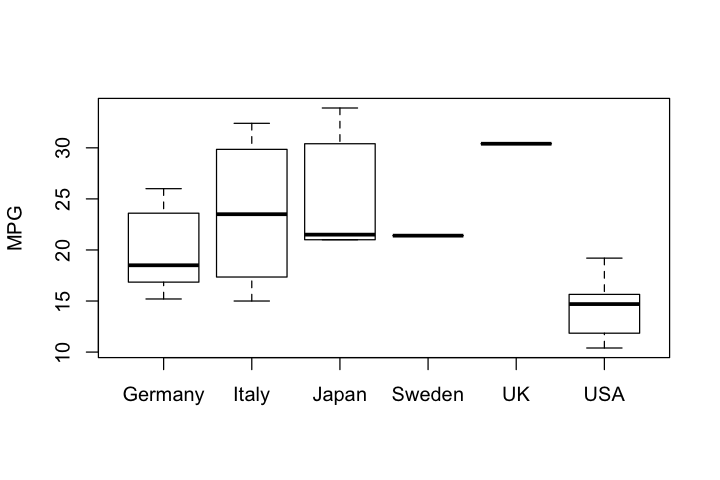

In [62]:
options(repr.plot.width=6, repr.plot.height=4)                                    # plot size for Jupyter notebook

plot(x = newcar_origin$Origin, y = newcar_origin$mpg, ylab="MPG")                 # plot using base R graphics

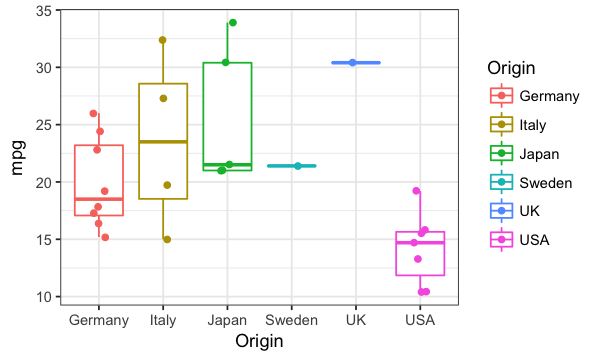

In [63]:
# Extra: Make ggplot2 boxplot
options(repr.plot.width=5, repr.plot.height=3)                        # sets plot size in Jupyter notebook 

# ggplot2 box plot
plot <- ggplot(newcar_origin, aes(x=Origin, y=mpg, color=Origin)) + geom_boxplot() # make simple boxplots
plot + geom_jitter(position=position_jitter(0.1)) + theme_bw()          # add underlying data with jitter 

## 5) Reshaping data 

Reshaping data from "wide" to "long" formats can be an important task.
Like aggregating, we may wish to see data cross tabulated in different ways.  For a visual representation and deeper tutorial, see https://www.r-statistics.com/2012/01/aggregation-and-restructuring-data-from-r-in-action/

We will use simple functions from the reshape2 pacakge to massage our data (included in above tutorial).

Workflows for data wrangling in R can be very powerful using the dplyr and tidyr libraries.  But these deserve their own workshop.  See the cheatsheet https://www.rstudio.com/wp-content/uploads/2015/02/data-wrangling-cheatsheet.pdf.  Also, see this fast tutorial to get started with tidyr: http://www.sthda.com/english/wiki/preparing-and-reshaping-data-in-r-for-easier-analyses.

### a) Transposing data 

In [64]:
# transposing data (flip axes)
mtcars_t <- t(mtcars)
head(mtcars_t)

,Mazda RX4,Mazda RX4 Wag,Datsun 710,Hornet 4 Drive,Hornet Sportabout,Valiant,Duster 360,Merc 240D,Merc 230,Merc 280,⋯,AMC Javelin,Camaro Z28,Pontiac Firebird,Fiat X1-9,Porsche 914-2,Lotus Europa,Ford Pantera L,Ferrari Dino,Maserati Bora,Volvo 142E
mpg,21.00,21.000,22.80,21.400,18.70,18.10,14.30,24.40,22.80,19.20,⋯,15.200,13.30,19.200,27.300,26.00,30.400,15.80,19.70,15.00,21.40
cyl,6.00,6.000,4.00,6.000,8.00,6.00,8.00,4.00,4.00,6.00,⋯,8.000,8.00,8.000,4.000,4.00,4.000,8.00,6.00,8.00,4.00
disp,160.00,160.000,108.00,258.000,360.00,225.00,360.00,146.70,140.80,167.60,⋯,304.000,350.00,400.000,79.000,120.30,95.100,351.00,145.00,301.00,121.00
hp,110.00,110.000,93.00,110.000,175.00,105.00,245.00,62.00,95.00,123.00,⋯,150.000,245.00,175.000,66.000,91.00,113.000,264.00,175.00,335.00,109.00
drat,3.90,3.900,3.85,3.080,3.15,2.76,3.21,3.69,3.92,3.92,⋯,3.150,3.73,3.080,4.080,4.43,3.770,4.22,3.62,3.54,4.11
wt,2.62,2.875,2.32,3.215,3.44,3.46,3.57,3.19,3.15,3.44,⋯,3.435,3.84,3.845,1.935,2.14,1.513,3.17,2.77,3.57,2.78


### b) Re-casting data shape

In [65]:
library(reshape2)

In [66]:
# refresher -- what does newcar_origin data look like
head(newcar_origin)

model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,econo,Make,Origin,Model
Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4,low mpg,Cadillac,USA,Fleetwood
Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4,low mpg,Camaro,USA,Z28
Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4,low mpg,Chrysler,USA,Imperial
Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2,low mpg,Dodge,USA,Challenger
Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6,low mpg,Ferrari,Italy,Dino
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1,econo,Fiat,Italy,128


In [67]:
# cast new data shape with dcast
mpg_by_country <- dcast(newcar_origin, Origin ~ cyl)    # dcast function makes new columns out of a factor
mpg_by_country                                          # defaults to counting, can use means as well

# you can specify a function for aggregation as well..

Using Model as value column: use value.var to override.
Aggregation function missing: defaulting to length


Origin,4,6,8
Germany,3,2,3
Italy,2,1,1
Japan,3,2,0
Sweden,1,0,0
UK,1,0,0
USA,0,0,7


### c) Melting data

Melting data takes the new columns "cyl" and stacks them back up into a single column.
This is how we make "long" data.  

This data format is needed to make stacked bar charts in gglot2.
The equivalent function to melt in tidyr is gather.

In [68]:
# melt data ito long format -- restacks factor
# mpg_by_c_melt <-melt(mpg_by_country)                                                   # simple call 
mpg_by_c_melt <-melt(mpg_by_country, variable.name = c("cyl"), value.name = "n_models")  # add variable names  
mpg_by_c_melt

Using Origin as id variables


Origin,cyl,n_models
Germany,4,3
Italy,4,2
Japan,4,3
Sweden,4,1
UK,4,1
USA,4,0
Germany,6,2
Italy,6,1
Japan,6,2
Sweden,6,0


### d) Why do US cars have such poor MPG ? 

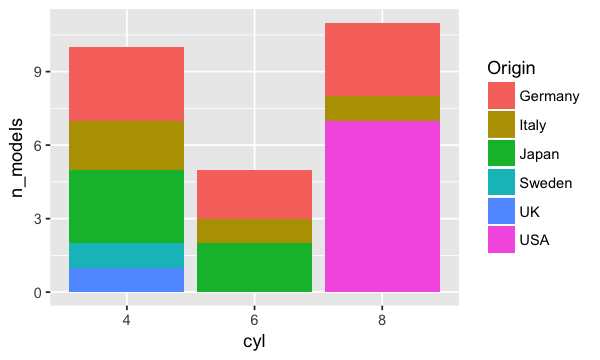

In [69]:
# plot number of models from each country by number of cylinders

options(repr.plot.width=5, repr.plot.height=3)  

ggplot(mpg_by_c_melt, aes(x=cyl, y = n_models, fill = Origin)) + # scale_fill_brewer(palette="Paired") +
    geom_bar(stat="identity")

## 6) Basic data structures: Getting data from matrices, vectors, and lists

This appendix shows how to manipulate basic data structures to get the data you want.  Unlike the earlier sections, this is laid out more as quick reference material rather than case studies with illustrated examples. 
These data structures are also described in the following tutorial, which may help fill in any missing gaps:
http://www.sthda.com/english/wiki/easy-r-programming-basics.

### a) Getting data from a matrix

Matrices hold only numeric data.  While more rudimentary than the data frames, matrices are required for some plots types, like heatmaps.

There are also some differences in syntax needed to slice data from a matrix vs. a data frame:

In [70]:
# a data matrix holds numbers, but not text
newcar_M <- data.matrix(newcar)                      # make data matrix   
tail(newcar_M)                                       # show last few rows

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,model,econo
Maserati Bora,15.0,3,301,335,3.54,3.570,14.60,0,1,5,8,6,2
Chrysler Imperial,14.7,3,440,230,3.23,5.345,17.42,0,0,3,4,5,2
Duster 360,14.3,3,360,245,3.21,3.570,15.84,0,0,3,4,4,2
Camaro Z28,13.3,3,350,245,3.73,3.840,15.41,0,0,3,4,3,2
Cadillac Fleetwood,10.4,3,472,205,2.93,5.250,17.98,0,0,3,4,1,2
Lincoln Continental,10.4,3,460,215,3.00,5.424,17.82,0,0,3,4,2,2


In [71]:
# Drop string column, make data matrix
newcar_d <- newcar[,1:ncol(newcar)-1]                  # drop last column using [,1:ncol(x)-1]
newcar_M <- data.matrix(newcar_d)                      # make data matrix   
tail(newcar_M)                                         # show last few rows

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,model
Maserati Bora,15.0,3,301,335,3.54,3.570,14.60,0,1,5,8,6
Chrysler Imperial,14.7,3,440,230,3.23,5.345,17.42,0,0,3,4,5
Duster 360,14.3,3,360,245,3.21,3.570,15.84,0,0,3,4,4
Camaro Z28,13.3,3,350,245,3.73,3.840,15.41,0,0,3,4,3
Cadillac Fleetwood,10.4,3,472,205,2.93,5.250,17.98,0,0,3,4,1
Lincoln Continental,10.4,3,460,215,3.00,5.424,17.82,0,0,3,4,2


In [72]:
# Ways to get data from data matrix
colnames(newcar_M)                                     # get column names of matrix; see also row.names(M)
newcar_M[1:3, 1:4]                                     # slice by location still works as in DF 
head(newcar_M['Mazda RX4',])                           # get matrix row, differs from DF 
head(newcar_M[,'mpg'])                                 # get column from matrix, differs from DF
# newcar_M$mpg                                           # DF method DOESN'T WORK on MATRIX  

[1] "mpg"   "cyl"   "disp"  "hp"    "drat"  "wt"    "qsec"  "vs"    "am"   
[10] "gear"  "carb"  "model"

,mpg,cyl,disp,hp
Toyota Corolla,33.9,1,71.1,65
Fiat 128,32.4,1,78.7,66
Honda Civic,30.4,1,75.7,52


mpg    cyl   disp     hp   drat     wt 
 21.00   2.00 160.00 110.00   3.90   2.62

Toyota Corolla       Fiat 128    Honda Civic   Lotus Europa      Fiat X1-9 
          33.9           32.4           30.4           30.4           27.3 
 Porsche 914-2 
          26.0

### b) Adding new data to a matrix

To add new data vectors to a matrix, use the cbind and rbind functions.

cbind binds a new column, rbind joins a new row.  If you use cbind or rbind, the output is a data matrix, not data frame.

In [73]:
# adding data to a matrix
power2weight <- newcar_M[,"hp"]/ newcar_M[,"wt"]          # make new variable

newcar_M2 <-cbind(newcar_M, power2weight)                 # cbind -> bind columns, dims must match
head(newcar_M2)                                           # related: rbind -> bind rows

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,model,power2weight
Toyota Corolla,33.9,1,71.1,65,4.22,1.835,19.90,1,1,4,1,32,35.42234
Fiat 128,32.4,1,78.7,66,4.08,2.200,19.47,1,1,4,1,31,30.00000
Honda Civic,30.4,1,75.7,52,4.93,1.615,18.52,1,1,4,2,29,32.19814
Lotus Europa,30.4,1,95.1,113,3.77,1.513,16.90,1,1,5,2,30,74.68605
Fiat X1-9,27.3,1,79.0,66,4.08,1.935,18.90,1,1,4,1,28,34.10853
Porsche 914-2,26.0,1,120.3,91,4.43,2.140,16.70,0,1,5,2,27,42.52336


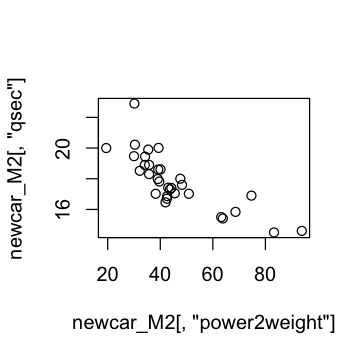

In [74]:
# plot the new variable vs. quarter mile time (qsec)
options(repr.plot.width=3, repr.plot.height=3)                                  # sets plot size in Jupyter notebook 
plot(x=newcar_M2[,"power2weight"], y=newcar_M2[,"qsec"])

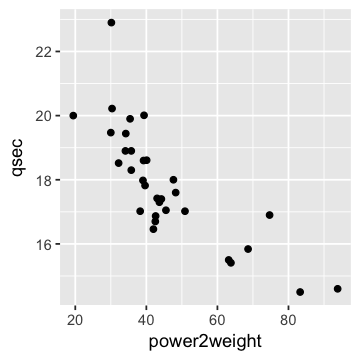

In [75]:
# ggplot doesn't like matrix, make data frame
newcar_M3 <-data.frame(newcar_M2)                                              # make matrix into data frame

plot <- ggplot(newcar_M3, aes(x= power2weight, y = qsec)) + geom_point()       # ggplot on data frame 
plot

# plot + stat_smooth(method = "lm", formula = y ~ x + I(x^2))                  # add quadratic fit
#ggplot(newcar_M2, aes(x= power2weight, y = qsec)) + geom_point()              # plot with matrix data doesn't work

### c) Make a new matrix 

In [76]:
# make new matrix of StarWars ticket sales
box_office <- c(460.998, 314.4, 290.475, 247.900, 309.306, 165.8)
star_wars_matrix <- matrix(box_office, nrow = 3, byrow = TRUE,
                           dimnames = list(c("A New Hope", "The Empire Strikes Back", "Return of the Jedi"), 
                                           c("US", "non-US")))
star_wars_matrix

,US,non-US
A New Hope,460.998,314.4
The Empire Strikes Back,290.475,247.9
Return of the Jedi,309.306,165.8


In [77]:
# Worldwide box office figures
worldwide <- rowSums(star_wars_matrix)                              # rowSums is counterpart to colSums  

# Bind the new worldwide column to star_wars_matrix
all_wars_matrix <- cbind(star_wars_matrix, worldwide)        # cbind is column bind, rbind for rows
all_wars_matrix

# previously we used data.frame to add data, now use cbind for matrix

,US,non-US,worldwide
A New Hope,460.998,314.4,775.398
The Empire Strikes Back,290.475,247.9,538.375
Return of the Jedi,309.306,165.8,475.106


### d) Sweep a function across a matrix 

The sweep function allows you to quickly make summaries by %, using rowSums or colSums functions. See also a simple application to gene expresion data:   
https://bioinfomagician.wordpress.com/2014/08/12/my-favorite-commands-part3-sweep-function-in-r/

In [78]:
# Sweep % total data by market from star wars box office data
percent_totals_by_market <-sweep(star_wars_matrix, 1, rowSums(star_wars_matrix)/100, "/")

# sweep star wars: for each row (1), divide ("/") by row total (rowSums). Dividing rowSums by 100 yields % data. 

percent_totals_by_market <- round(percent_totals_by_market, 2)
percent_totals_by_market

,US,non-US
A New Hope,59.45,40.55
The Empire Strikes Back,53.95,46.05
Return of the Jedi,65.10,34.90


### e) Getting data from vectors

In [79]:
# Slicing vector data 
mpg_vect <-newcar_M2[,'mpg']                                 # get vector from matrix column, differs from DF
econo <- mpg_vect[mpg_vect > 20]                             #  get subset from vector, similar to DF (no ",")
econo

# Get vector item by index name, number
econo["Fiat 128"]                                            # by index name
econo[1]                                                     # by index number 
names(econo)                                                 # equivalent to row.names, colnames
                                                             # can be assigned similarly: names(x) <- c("nam1", "nam2")

Toyota Corolla       Fiat 128    Honda Civic   Lotus Europa      Fiat X1-9 
          33.9           32.4           30.4           30.4           27.3 
 Porsche 914-2      Merc 240D     Datsun 710       Merc 230  Toyota Corona 
          26.0           24.4           22.8           22.8           21.5 
Hornet 4 Drive     Volvo 142E      Mazda RX4  Mazda RX4 Wag 
          21.4           21.4           21.0           21.0

Fiat 128 
    32.4

Toyota Corolla 
          33.9

[1] "Toyota Corolla" "Fiat 128"       "Honda Civic"    "Lotus Europa"  
 [5] "Fiat X1-9"      "Porsche 914-2"  "Merc 240D"      "Datsun 710"    
 [9] "Merc 230"       "Toyota Corona"  "Hornet 4 Drive" "Volvo 142E"    
[13] "Mazda RX4"      "Mazda RX4 Wag"

### f) Getting data from lists

In [80]:
# Make a list 
econo_l <-as.list(econo)                # make list
#head(econo_l)                          # head list
econo_l[1:3]                            # chunk of list 

$`Toyota Corolla`
[1] 33.9

$`Fiat 128`
[1] 32.4

$`Honda Civic`
[1] 30.4

In [81]:
# Get list info
length(econo_l)                                           # how long is list?
dim(econo_l)                                              # dim doesn't work on 1-d objects (lists, vectors)

[1] 14

NULL

In [82]:
# several ways to get data from list:
econo_l[[1]]                                              # by position in list, unlike other data structures
econo_l["Mazda RX4"]                                      # by name
names(econo_l)                                            # get names of list
# names(econo_l) <-c("MPG", "cyl"....)                    # assign names to list (length must match)

[1] 33.9

$`Mazda RX4`
[1] 21

[1] "Toyota Corolla" "Fiat 128"       "Honda Civic"    "Lotus Europa"  
 [5] "Fiat X1-9"      "Porsche 914-2"  "Merc 240D"      "Datsun 710"    
 [9] "Merc 230"       "Toyota Corona"  "Hornet 4 Drive" "Volvo 142E"    
[13] "Mazda RX4"      "Mazda RX4 Wag"

## 7) Basic programming in R

Here we look at some basic programming techniques in R -- for loops, defining functions, and the apply family of functions. These tools can help to automate your workflows and reduce the amount of code you write.  If you are copying and pasting blocks of code, learn these tecnhiques and automate those coding tasks!

For loops are the most elemental examples of programming, but are slow and basic.  We can accomplish the same thing by making a function and applying it over our data.  Simple examples are shown for writing functions, and using the apply family of functions to apply these functions to dataframes, matrices, vectors and lists.

The apply family of functions are explained in this tutorial: http://uc-r.github.io/apply_family
For deeper instruction on programming check out http://adv-r.had.co.nz/Functional-programming.html

### a) For loops

For loops are the beginning of making simple iterative functions.  

However, for loops are generally frowned upon as their results are compiled at each step, slowing down the process.  Later we will show preferred alternatives using the apply family of functions

In [83]:
# Make a vector 
froot_loops <- c("red", "orange", "yellow", "green", "blue", "purple")

# make a for loop
for(i in froot_loops){                         # structure: for(x in data){evaluate something}
    print(i)
    }

[1] "red"
[1] "orange"
[1] "yellow"
[1] "green"
[1] "blue"
[1] "purple"


In [84]:
# Generate numbers using built in seq function 
ten_nums <- seq(1:10)                                         # Sequence of numbers (1:10)
ten_evens<- seq(1,20, by=2)                                   # Seq, skipping odds

In [85]:
# for loop using numbers
for(x in ten_evens){
    print(x)
}

[1] 1
[1] 3
[1] 5
[1] 7
[1] 9
[1] 11
[1] 13
[1] 15
[1] 17
[1] 19


### b) Defining functions

In [86]:
# make a simple function
squared = function(x){                                         # function of x
    x2 <- x*x
    return(x2)
}

In [87]:
# test function
squared(10)

[1] 100

In [88]:
# could use for loop to print using own function
for(x in ten_nums){
    print(squared(x))
}

[1] 1
[1] 4
[1] 9
[1] 16
[1] 25
[1] 36
[1] 49
[1] 64
[1] 81
[1] 100


In [89]:
# Make this into a vector, then a DF using for loop.         
ten_nums_sq <- numeric(length = length(ten_nums))            # make an empty numeric vector (to hold numbers)

for(x in seq_along(ten_nums)) {                              # seq_along iterates of numbers
   ten_nums_sq[x] <-squared(x)                               # at each iteration, yield squared(x)
}
ten_nums_sq                                                  # return "filled" numeric vector

[1]   1   4   9  16  25  36  49  64  81 100

In [90]:
# That is ugly and inefficient code!

In [91]:
# instead, just use function on vector
squared(ten_nums)

[1]   1   4   9  16  25  36  49  64  81 100

In [92]:
# use this to define a new variable
squared_nums <-data.frame(num = ten_nums)
squared_nums$num_sq <- squared(ten_nums)
squared_nums

num,num_sq
1,1
2,4
3,9
4,16
5,25
6,36
7,49
8,64
9,81
10,100


### c) Apply family of functions

The apply family of functions help to apply a function over matrices, vectors, and lists.  
This is much more graceful than using for loops.  Again, check out this nice tutorial from the UC Business Analytics R Programming guide: http://uc-r.github.io/apply_family

##### Apply family of functions:
    - apply: vector or matrix, specify dimension (margin)
    - lapply: returns a list
    - sapply: simplifies output (with varying success)
    - mapply: apply function to matrix
    - tapply: apply by group

In [93]:
# remember our cars data set?  we summarized the data like this
colMeans(mtcars)

mpg        cyl       disp         hp       drat         wt       qsec 
 20.090625   6.187500 230.721875 146.687500   3.596563   3.217250  17.848750 
        vs         am       gear       carb 
  0.437500   0.406250   3.687500   2.812500

In [94]:
# The above is just a convenience function for apply, used on means, across columns 
apply(mtcars, 2, mean)                                           # here 2 is to apply across columns (2nd dim)
#apply(mtcars, 1, mean)                                          # 1 is applied across rows, same as rowSums()

mpg        cyl       disp         hp       drat         wt       qsec 
 20.090625   6.187500 230.721875 146.687500   3.596563   3.217250  17.848750 
        vs         am       gear       carb 
  0.437500   0.406250   3.687500   2.812500

In [95]:
# note we can't apply mean to newcars, which has non-numeric data
# head(newcar)
# apply(newcar, 2, mean)                                               # doesn't work

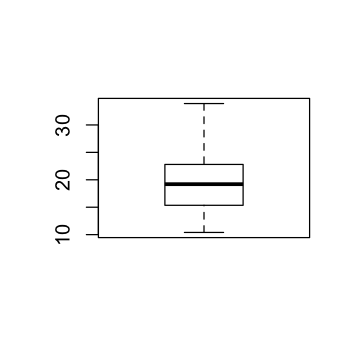

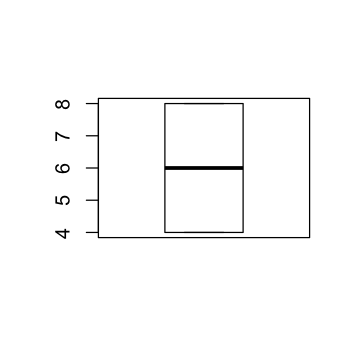

10.40
15.35
19.20
22.80
33.90
17.11916
21.28084
4
4
6
8


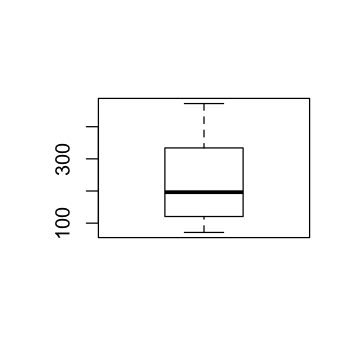

In [96]:
# use apply to make plots
apply(mtcars[,1:3], 2, boxplot)

Other apply functions: lapply, sapply, tapply, mapply

In [97]:
# lapply gives output as list
mean_list <- lapply(mtcars, mean)
head(mean_list)

$mpg
[1] 20.09062

$cyl
[1] 6.1875

$disp
[1] 230.7219

$hp
[1] 146.6875

$drat
[1] 3.596563

$wt
[1] 3.21725

In [98]:
# several ways to get data from list:
mean_list[[1]]                                              # by position in list, unlike other data structures
mean_list["cyl"]                                            # by name
names(mean_list)                                            # get names of list
# names(mean_list) <-c("MPG", "cyl"....)                    # assign names to list (length must match)

[1] 20.09062

$cyl
[1] 6.1875

[1] "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"   "gear"
[11] "carb"

In [99]:
# unlist a list
unlist(mean_list)                                            # unlist makes a list into a vector

mpg        cyl       disp         hp       drat         wt       qsec 
 20.090625   6.187500 230.721875 146.687500   3.596563   3.217250  17.848750 
        vs         am       gear       carb 
  0.437500   0.406250   3.687500   2.812500

In [100]:
# Many times when we need to unlist an object from lapply, we are better off using sapply instead (simplifies): 

In [101]:
# sapply simplifies output from apply, as best as it can
sapply(mtcars, mean)                                         # use sapply

# yes, this is exactly the same as colMeans we used in part 3 -- colMeans is a convenience function from sapply

mpg        cyl       disp         hp       drat         wt       qsec 
 20.090625   6.187500 230.721875 146.687500   3.596563   3.217250  17.848750 
        vs         am       gear       carb 
  0.437500   0.406250   3.687500   2.812500

In [102]:
# apply function to whole matrix with mapply

In [103]:
# mapply applies to matrices-- 
cars_squared <- mapply(mtcars, FUN = squared)          # use mapply, with the "squared" function we defined earlier
head(cars_squared)

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
441.00,36,25600,12100,15.2100,6.864400,270.9316,0,1,16,16
441.00,36,25600,12100,15.2100,8.265625,289.6804,0,1,16,16
519.84,16,11664,8649,14.8225,5.382400,346.3321,1,1,16,1
457.96,36,66564,12100,9.4864,10.336225,377.9136,1,0,9,1
349.69,64,129600,30625,9.9225,11.833600,289.6804,0,0,9,4
327.61,36,50625,11025,7.6176,11.971600,408.8484,1,0,9,1


In [104]:
# also of related interest here is the SWEEP function

In [105]:
# tapply is used to apply by groups
tapply(mtcars$mpg, mtcars$cyl, mean)                       # get mean of mpg by cylinder                                  

4        6        8 
26.66364 19.74286 15.10000

In [106]:
# tapply to whole matrix  -- embedded in apply across matrix
apply(mtcars, 2, function(x) tapply(x, mtcars$cyl, mean))

# here in apply function(x) is used to specify function that follows
# in this case the function is to tapply mean of mtcars by cylinder, for each x
# then we apply this to each column (2) in mtcars       

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
4,26.66364,4,105.1364,82.63636,4.070909,2.285727,19.13727,0.9090909,0.7272727,4.090909,1.545455
6,19.74286,6,183.3143,122.28571,3.585714,3.117143,17.97714,0.5714286,0.4285714,3.857143,3.428571
8,15.10000,8,353.1000,209.21429,3.229286,3.999214,16.77214,0.0000000,0.1428571,3.285714,3.500000


In [107]:
# note the outcome is almost exactly the same as when we used aggregate in part 3
cyl_means <-aggregate(mtcars, by=list(mtcars$cyl), FUN=mean)         # use aggregate, with function as mean
#colnames(cyl_means)[1] <-"cylinders"                                # rename first column
cyl_means

Group.1,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
4,26.66364,4,105.1364,82.63636,4.070909,2.285727,19.13727,0.9090909,0.7272727,4.090909,1.545455
6,19.74286,6,183.3143,122.28571,3.585714,3.117143,17.97714,0.5714286,0.4285714,3.857143,3.428571
8,15.10000,8,353.1000,209.21429,3.229286,3.999214,16.77214,0.0000000,0.1428571,3.285714,3.500000



## Keep clean organized code and files, and good luck learning more R! 